In [122]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

In [123]:
# Get the current working directory
directory = os.getcwd()

In [124]:
# Load data
directory_data = directory + '\\Data\\sfo 2018_data file_final_Weighted.xlsx'
data_2018 = pd.read_excel(directory_data, engine='openpyxl', sheet_name='DATA')
code_list_2018 = pd.read_excel(directory_data, engine='openpyxl', sheet_name='Code List')
data_2018

,RESPNUM,CCGID,RUNID,INTDATE,DAY,GATE,BAREA,STRATA,PEAK,METH,...,HOME,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT
0,1842,1680,552,21,2,102,G,3,3,1,...,15,2,6,2,0,0,2,2,1,0.670484
1,1844,1681,552,21,2,102,G,3,3,1,...,15,2,4,1,2,1,2,2,1,0.670484
2,1840,1678,552,21,2,102,G,3,3,1,...,15,1,5,1,5,2,2,2,1,0.670484
3,1837,1676,552,21,2,102,G,3,3,1,...,15,2,2,2,3,3,2,1,1,0.670484
4,1833,1674,552,21,2,102,G,3,3,1,...,15,2,2,2,2,2,2,2,1,0.670484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,9001,9001,904,2,4,72,F,2,2,3,...,11,2,4,1,4,2,1,2,1,1.486925
2805,2971,2791,5,1,3,87,F,2,1,3,...,12,2,6,2,4,3,1,2,1,1.486925
2806,9002,9002,68,5,7,83,F,2,1,3,...,99,2,6,2,4,2,2,2,1,1.486925
2807,9004,9004,541,18,6,98,G,3,3,3,...,3,2,4,2,4,2,2,1,1,0.346120


In [125]:
# 0, 99, BLANK - NAN

In [126]:
# Select columns
data_2018 = data_2018[data_2018.columns.drop(['CCGID', 'DESTINATION', 'AIRLINE'])]

In [127]:
data_2018.describe()

,RESPNUM,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,AIRLINE_CODE,...,HOME,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT
count,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,...,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000,2809.000000
mean,1821.937700,14.079032,4.127447,50.647205,2.148095,2.161979,1.012460,1.880384,1414.961552,18.993592,...,18.608046,1.657529,4.045568,1.448558,2.046992,1.817017,1.595586,1.541118,1.103596,0.999999
std,942.654669,8.193408,1.692994,33.241023,0.780914,0.750427,0.125978,0.324569,1714.986966,10.422210,...,26.604692,0.730039,1.864170,0.611737,1.493790,0.700515,0.678995,0.697855,0.442109,0.490976
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.208038
25%,1052.000000,8.000000,3.000000,12.000000,2.000000,2.000000,1.000000,2.000000,394.000000,8.000000,...,7.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.670484
50%,1869.000000,15.000000,4.000000,52.000000,2.000000,2.000000,1.000000,2.000000,857.000000,22.000000,...,10.000000,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.061139
75%,2594.000000,20.000000,5.000000,81.000000,3.000000,3.000000,1.000000,2.000000,1747.000000,30.000000,...,14.000000,2.000000,6.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.486925
max,9004.000000,31.000000,7.000000,102.000000,3.000000,3.000000,3.000000,2.000000,8839.000000,33.000000,...,99.000000,2.000000,7.000000,3.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.887528


In [128]:
# Drop variables with null values
data_2018 = data_2018[data_2018.columns.drop(['Q3GETTO2', 'Q2PURP2', 'Q2PURP3', 'Q3GETTO3', 'Q3PARK', 'Q8-2', 'Q8-3', 'Q8-4', 'Q8-5', 'Q8-6', 'Q9-2', 'Q9-3', 'Q10-2', 'Q10-3', 'Q12PRECHECKRATE', 'Q12-1', 'Q12-2', 'Q12-3', 'Q15A', 'Q15-1', 'Q15-2', 'Q15-3', 'Q18ZIP', 'Q18CITY', 'Q18COUNTY', 'Q18COUNTRY', 'Q18STATE', 'RUNID', 'BAREA', 'ARRTIME', 'DEPTIME', 'HOWLONG'])]

In [129]:
data_2018.loc[data_2018['Q7ALL'] == 'BLANK', 'Q7ALL'] = 0

In [130]:
data_2018

,RESPNUM,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,AIRLINE_CODE,...,HOME,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT
0,1842,21,2,102,3,3,1,2,80,29,...,15,2,6,2,0,0,2,2,1,0.670484
1,1844,21,2,102,3,3,1,2,80,29,...,15,2,4,1,2,1,2,2,1,0.670484
2,1840,21,2,102,3,3,1,1,80,29,...,15,1,5,1,5,2,2,2,1,0.670484
3,1837,21,2,102,3,3,1,1,80,29,...,15,2,2,2,3,3,2,1,1,0.670484
4,1833,21,2,102,3,3,1,2,80,29,...,15,2,2,2,2,2,2,2,1,0.670484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2804,9001,2,4,72,2,2,3,2,1889,30,...,11,2,4,1,4,2,1,2,1,1.486925
2805,2971,1,3,87,2,1,3,2,794,30,...,12,2,6,2,4,3,1,2,1,1.486925
2806,9002,5,7,83,2,1,3,2,535,30,...,99,2,6,2,4,2,2,2,1,1.486925
2807,9004,18,6,98,3,3,3,2,571,3,...,3,2,4,2,4,2,2,1,1,0.346120


In [131]:
print(data_2018.isnull().sum().to_markdown())

|              |   0 |
|:-------------|----:|
| RESPNUM      |   0 |
| INTDATE      |   0 |
| DAY          |   0 |
| GATE         |   0 |
| STRATA       |   0 |
| PEAK         |   0 |
| METH         |   0 |
| SAQ          |   0 |
| FLIGHT       |   0 |
| AIRLINE_CODE |   0 |
| DEST_CODE    |   0 |
| DESTGEO      |   0 |
| DESTMARK     |   0 |
| Q2PURP1      |   0 |
| Q3GETTO1     |   0 |
| Q4BAGS       |   0 |
| Q4STORE      |   0 |
| Q4FOOD       |   0 |
| Q4WIFI       |   0 |
| Q5TIMESFLOWN |   0 |
| Q5FIRSTTIME  |   0 |
| Q6LONGUSE    |   0 |
| Q7ART        |   0 |
| Q7FOOD       |   0 |
| Q7STORE      |   0 |
| Q7SIGN       |   0 |
| Q7WALKWAY    |   0 |
| Q7SCREENS    |   0 |
| Q7INFODOWN   |   0 |
| Q7INFOUP     |   0 |
| Q7WIFI       |   0 |
| Q7ROADS      |   0 |
| Q7PARK       |   0 |
| Q7AIRTRAIN   |   0 |
| Q7LTPARKING  |   0 |
| Q7RENTAL     |   0 |
| Q7ALL        |   0 |
| Q8-1         |   0 |
| Q9Boarding   |   0 |
| Q9AirTrain   |   0 |
| Q9Rental     |   0 |
| Q9Food   

In [132]:
scaler = StandardScaler()

scaler.fit(data_2018)

scaled_data = scaler.transform(data_2018)

In [133]:
def generate_elbow_plot(clusters_centers, k_values):

    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

In [134]:
def find_best_clusters(df, maximum_K):

    clusters_centers = []
    k_values = []

    for k in range(1, maximum_K):

        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)


    return clusters_centers, k_values

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\

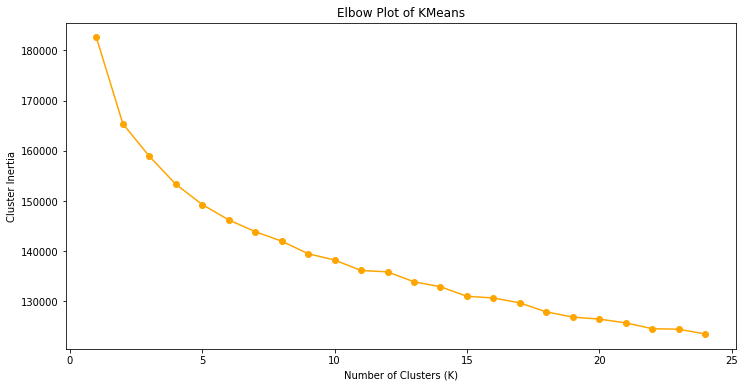

In [149]:
clusters_centers, k_values = find_best_clusters(scaled_data, 25)

generate_elbow_plot(clusters_centers, k_values)

In [150]:
kmeans_model = KMeans(n_clusters = 2)

kmeans_model.fit(scaled_data)

c:\users\alicj\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [151]:
data_2018["clusters"] = kmeans_model.labels_

data_2018.head()

,RESPNUM,INTDATE,DAY,GATE,STRATA,PEAK,METH,SAQ,FLIGHT,AIRLINE_CODE,...,Q19Clear,Q20Age,Q21Gender,Q22Income,Q23FLY,Q24SJC,Q24OAK,LANG,WEIGHT,clusters
0,1842,21,2,102,3,3,1,2,80,29,...,2,6,2,0,0,2,2,1,0.670484,0
1,1844,21,2,102,3,3,1,2,80,29,...,2,4,1,2,1,2,2,1,0.670484,0
2,1840,21,2,102,3,3,1,1,80,29,...,1,5,1,5,2,2,2,1,0.670484,0
3,1837,21,2,102,3,3,1,1,80,29,...,2,2,2,3,3,2,1,1,0.670484,1
4,1833,21,2,102,3,3,1,2,80,29,...,2,2,2,2,2,2,2,1,0.670484,1


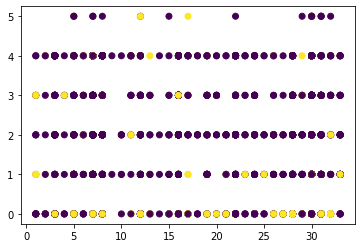

In [152]:
plt.scatter(data_2018['AIRLINE_CODE'],
            data_2018['Q22Income'],
            c = data_2018["clusters"])